<a href="https://colab.research.google.com/github/anabarbalho/qr105_lecture_notes/blob/main/l08_1_statistics_ii_displaying_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.1 Statistics Part II: Displaying Data




## Categorizing Data
There are two main types of data you may need to handle. Categorical (or qualitative) data and Quantitative (or numerical) data.
> **Categorical Data**  
Categorical (or qualitative) data are pieces of information that allow us to classify the objects under investigation into various categories.

For example, surveying a population for their favorite type of ice cream.

> **Quantitative Data**  
Quantitative data are responses that are numerical in nature and with which we can perform meaningful arithmetic calculations.

For example, surveying a population for the number of times they've had ice cream in the last month

Each of these data types is handled differently when it comes to displaying it. We'll cover each in their own sections in this notebook.

### A word about misrepresenting data
In this notebook, we'll be focusing on the appropriate ways to represent data visually. But it is worth noting that there are a TON of ways to create misleading graphs. Consult either of the textbooks for some examples of how this can happen.

## Data in Python: Pandas, Numpy, and Matplotlib

There are three major 3rd party libraries we will use when exploring statistics. They are Pandas, Numpy, and Matplotlib.

* Pandas -  a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
* Numpy - an open source project that enables numerical computing with Python.
* Matplotlib - a library for creating static, animated, and interactive visualizations.

These are already installed on your system so all we need to do is import them to make use of them in our notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Pandas Dataframes
Pandas allows us to take data and organize it in something called a *dataframe* or a *series*. Think of this like a table of data.

* A **`Series`** is a one-dimensional array of values **with an index**.
* A **`DataFrame`** is a two-dimensional array of values **with both a row and column index**.
* It turns out - each column of a `DataFrame` is actually a `Series`!

For small data sets, you can create a dataframe from lists or dictionaries of values.

In [ ]:
data = [
    ["John", 662383, "Male", 'Freshman'],
    ["Sarah", 750648, "Female", 'Senior'],
    ["Michael", 498152, "Male", 'Junior'],
    ['Alice', 689413, 'Female', 'Sophomore'],
    ["Diana", 337491, 'Female', 'Freshman'],
    ['Charlie', 839573, 'Male', 'Senior'],
]
## construct dataframe
df = pd.DataFrame(data, columns = ['name', 'id_number', 'gender', 'class'])

# show dataframe (jupyter nb only)
df

,name,id_number,gender,class
0,John,662383,Male,Freshman
1,Sarah,750648,Female,Senior
2,Michael,498152,Male,Junior
3,Alice,689413,Female,Sophomore
4,Diana,337491,Female,Freshman
5,Charlie,839573,Male,Senior


In [ ]:
# show part of a dataframe
df.head()
# df.head(10)

,name,id_number,gender,class
0,John,662383,Male,Freshman
1,Sarah,750648,Female,Senior
2,Michael,498152,Male,Junior
3,Alice,689413,Female,Sophomore
4,Diana,337491,Female,Freshman


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       6 non-null      object
 1   id_number  6 non-null      int64 
 2   gender     6 non-null      object
 3   class      6 non-null      object
dtypes: int64(1), object(3)
memory usage: 324.0+ bytes


In a Jupyter notebook this prints out nicely in a table format.

### Pandas Series

Now, say we wanted to just look at the list of names. We use the column heading in square brackets.

In [ ]:
df['name']

,name
0,John
1,Sarah
2,Michael
3,Alice
4,Diana
5,Charlie


A single column from a dataframe is called a *series*. There are different methods (i.e. functions) in pandas that work on series than on dataframes. It can sometimes be confusing which works for each object. Don't be afraid to search online for assistance if you get confused.

We can also get multiple columns using double square brackets. We can also get them in any order we like.

In [ ]:
df[['name', 'id_number']]

,name,id_number
0,John,662383
1,Sarah,750648
2,Michael,498152
3,Alice,689413
4,Diana,337491
5,Charlie,839573


In [ ]:
df[['id_number', 'name']]

,id_number,name
0,662383,John
1,750648,Sarah
2,498152,Michael
3,689413,Alice
4,337491,Diana
5,839573,Charlie


#### Try it Yourself

Get the `name`, `gender`, and `class` from the dataframe `df`.

In [ ]:
df[['name', 'gender', 'class']]


,name,gender,class
0,John,Male,Freshman
1,Sarah,Female,Senior
2,Michael,Male,Junior
3,Alice,Female,Sophomore
4,Diana,Female,Freshman
5,Charlie,Male,Senior


In [ ]:
# name and class
df[['name','class']]

,name,class
0,John,Freshman
1,Sarah,Senior
2,Michael,Junior
3,Alice,Sophomore
4,Diana,Freshman
5,Charlie,Senior


## Working with Categorical Data

### Frequency Table

A frequency table gives us a means to summarize survey data.

> **Frequency Table**
A frequency table is a table with two columns. One column lists the categories, and another for the frequencies with which the items in the categories occur (how many items fit into each category).

To demonstrate what this looks like, we'll discuss a simple example involving data collected that asked which social media platform a person uses most. The responses were 'Instagram', 'Twitter', 'Snapchat', 'None', and 'Facebook'.

#### Creating a frequency table

In this example, our responses are just given as a list of values. From this we'll construct a dataframe and then determine the count for each response. We'll separate out each step so we can see what's happening at each stage.

In [ ]:
# data from survey responses.
raw_data = ['None', 'Twitter', 'Snapchat', 'Snapchat', 'Twitter', 'Facebook', 'Instagram', 'Snapchat', 'Twitter', 'None', 'Snapchat', 'Instagram', 'Instagram', 'Facebook', 'None', 'Instagram', 'Snapchat', 'Twitter', 'Snapchat', 'Instagram', 'Instagram', 'Twitter', 'Snapchat', 'Twitter', 'Facebook', 'None', 'Instagram', 'Instagram', 'Twitter', 'Instagram']
# construct a dataframe
sm = pd.DataFrame(raw_data, columns=['Platform'])
# display the dataframe constructed
sm.head(10)

,Platform
0,None
1,Twitter
2,Snapchat
3,Snapchat
4,Twitter
5,Facebook
6,Instagram
7,Snapchat
8,Twitter
9,None


To get the counts for each category we apply the `value_counts()` function to the `'Platform'` column of our dataframe. This will create a series of our value counts. Storing this in a variable will make it easier to use later in constructing our plots.

In [ ]:
# make a series that stores the counts of each platform
sm_counts = sm['Platform'].value_counts()
sm_counts

,count
Platform,
Instagram,9
Snapchat,7
Twitter,7
None,4
Facebook,3


The result is a frequency table - it shows us each category and the count of responses in each category. Much easier than doing this by hand!

#### Try it Yourself

Create a series called `animal_counts` that contains the entries for a frequency table (like the output from the cell above) using the following dataset.


In [ ]:
animals_data = ['Mammal', 'Mammal', 'Reptile', 'Bird', 'Mammal', 'Amphibian', 'Mammal', 'Mammal', 'Mammal', 'Reptile', 'Mammal', 'Bird', 'Mammal', 'Bird', 'Reptile', 'Reptile', 'Amphibian', 'Mammal', 'Bird', 'Mammal', 'Amphibian', 'Mammal', 'Mammal', 'Bird']

# construct a dataframe
animals = pd.DataFrame(animals_data, columns= ['animal_type'])
# store the value counts in a pandas series
animal_counts = animals['animal_type'].value_counts()
# print the series
animal_counts

,count
animal_type,
Mammal,12
Bird,5
Reptile,4
Amphibian,3


### Bar Graphs

Tables are nice ways of displaying data, but often we want different ways to visualize our data. There a ton of different ways data can be visually represented. You want to choose the one that helps you see trends or shows results that are easier to understand. The most basic of these is a bar graph.

> **Bar Graph**  
A bar graph is a graph that displays a bar for each category with the length of each bar indicating the frequency of that category.


#### Creating a Bar Graph

Now we'll make a bar graph using our `sm_counts` we stored earlier. AThis is where we use the library [Matplotlib](https://matplotlib.org/stable/users/index.html).

Text(0, 0.5, 'Count')

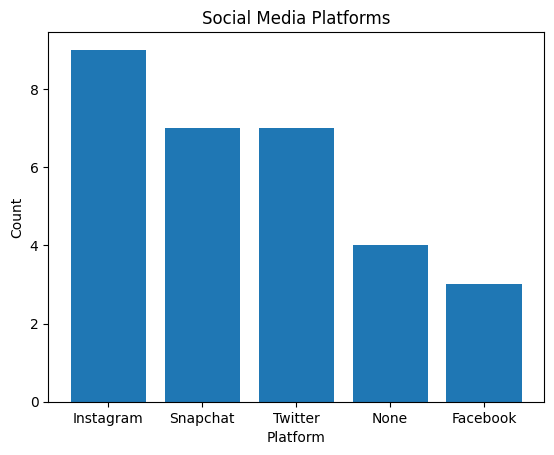

In [ ]:
plt.bar(sm_counts.index, sm_counts.values)
plt.title('Social Media Platforms') # gives plot a title
plt.xlabel('Platform') # labels the x axis
plt.ylabel('Count') # labels the y axis

We can change colors for each of our bars as well. You can find more named colors in the [documentation](https://matplotlib.org/stable/gallery/color/named_colors).

Text(0, 0.5, 'Count')

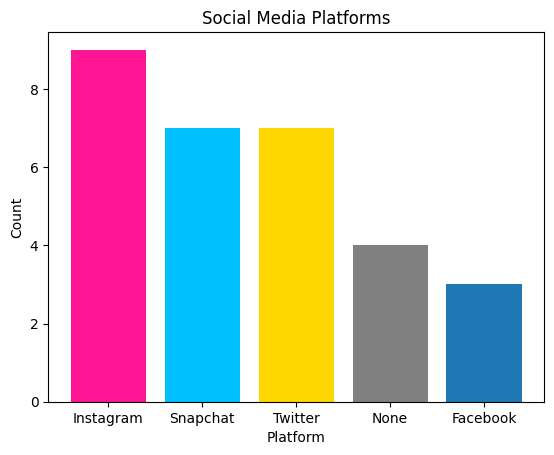

In [ ]:
plt.bar(sm_counts.index, sm_counts.values, color=['deeppink', 'deepskyblue', 'gold', 'gray', 'tab:blue'])
plt.title('Social Media Platforms') # gives plot a title
plt.xlabel('Platform') # labels the x axis
plt.ylabel('Count') # labels the y axis

There are a ton of ways to customize your plots. Options can be found in the documentation.

#### Try it Yourself

Use your `animal_counts` data you constructed above to make a bar graph of the animal counts. Make sure your plot has a relevant title, and x and y axis labels. Change the color of the bars to something other than the default blue.

Text(0, 0.5, 'Count')

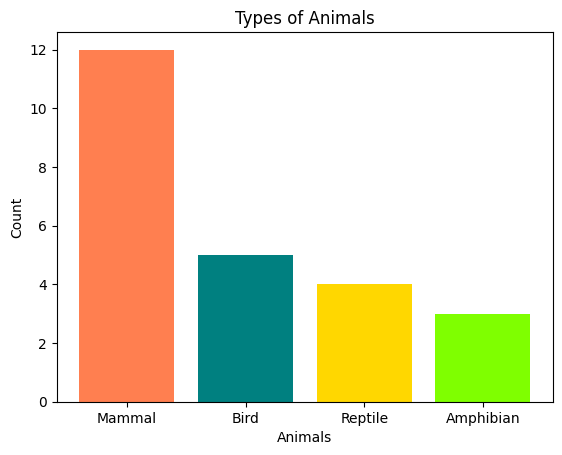

In [ ]:
# create bar chart
plt.bar(animal_counts.index, animal_counts.values, color=['coral', 'teal', 'gold', 'chartreuse', 'tab:blue'])
plt.title('Types of Animals')
plt.xlabel('Animals')
plt.ylabel('Count')

# add title & axis labels

### Pie Charts

Another common way to present data is in a Pie Chart. A pie chart uses percentages (or relative frequencies) rather than raw counts. In other words, a pie chart shows us how each data category is relative to the total number of categories.

> **Pie Chart**  
> A pie chart is a circle with wedges cut of varying sizes marked out like slices of pie or pizza.  The relative sizes of the wedges correspond to the relative frequencies of the categories.


#### Create a Pie Chart
First we need to find the percent of the total number of responses for each response category in our social media data. We can do this directly by using the `normalize` option in `value_counts()`.


In [ ]:
# save in a new series
sm_percents = sm['Platform'].value_counts(normalize=1)
sm_percents

,proportion
Platform,
Instagram,0.300000
Snapchat,0.233333
Twitter,0.233333
None,0.133333
Facebook,0.100000


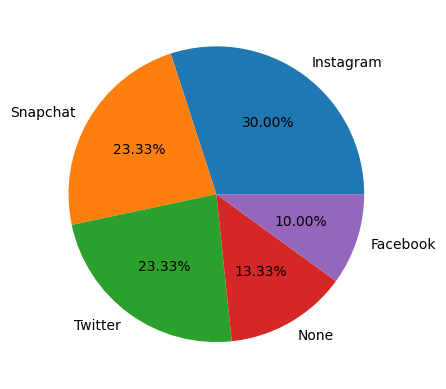

In [ ]:
# make pie chart
plt.pie(x=sm_percents.values, labels=sm_percents.index, autopct='%1.2f%%');

**Caution with Pie Charts**  
Be careful with using pie charts and even more careful with data presented in a pie chart. Because relative frequencies are being used it's a lot more difficult to see some key information. For example, how many people were surveyed? 10? 100? 1000? Pie charts a great way to *misrepresent* data. Always be wary of them when looking at results of studies and always ask yourself if it's the best way to present data in your own work.

#### Try it Yourself

Use your `animal_counts` data you constructed above to make a pie chart of the animal counts. Make sure your plot has a relevant title. Don't forget that first you need to calculate the percents.

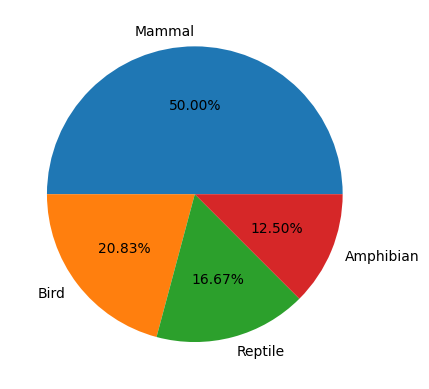

In [ ]:
## save in new series named animal_percents
animal_percents = animals['animal_type'].value_counts(normalize=1)
animal_percents
## generate pie chart
plt.pie(x=animal_percents.values, labels=animal_percents.index, autopct='%1.2f%%');


## Working with Quantitative Data
Now we'll see how to handle quantitative data.

### Working with Larger Data Sets with Pandas

Now that we've seen how to handle some basic data sets we need to look at how we can actually read in data from a larger data set that is stored in an outside file.

The most common file type we will use is called a `.csv` file. This stands for *comma separated values*. You can save a spreadsheet created in Excel or Google Sheets or any other spreadsheet program as a `.csv` file.

To import the data from our file we need to use the pandas function `read_csv`. When we use this function, we store the output in a variable to store the data as a pandas dataframe.

In [ ]:
nwsl = pd.read_csv('NWSL_data.csv')
nwsl.head()

> This data set is from the 2021 National Women’s Soccer League season. The columns are standings points (PTS; teams earn three points for a win and one point for a tie), wins (W), losses (L), ties (T), goals scored by that team (GF), and goals scored against that team (GA).

Now that the data from the `.csv` file is stored in a dataframe, we can easily access a lot of information and do some data analysis. For now, we're just going to explore some of the basics of how to navigate a dataframe.

Say we wanted to focus on a particular column or subset of columns. Each column has a heading name that allows us to reference it. We do this by using the heading name and square brackets as shown below.

In [ ]:
nwsl['Team']

In [ ]:
# select a subset of columns
nwsl[['Team', 'PTS', 'GF', 'GA']]

We'll explore more of how to use Pandas in the future. Now that we have our data set read in, we'll see how we can create a histogram.

### Histogram

One of the most common ways to visualize the distribution of data is in a histogram. Suppose we wanted to understand the range of losses teams experience in a season. A bar chart won't really make sense for this. It doesn't give us a sense of the distribution of losses.

In [ ]:
loss_counts = nwsl['PTS'].value_counts()
plt.bar(loss_counts.index, loss_counts.values)
plt.title('Standing Points NWSL Bar Graph') # gives plot a title

It's going to make more sense to treat the horizontal axis like a number line. We then establish equally spaced sub intervals or 'bins' in which we will collect values that fall in a particular range. This is type graph is called a histogram.

> **Histogram**  
> A histogram is like a bar graph, but where the horizontal axis is a number line.

We organize values that fall in a certain sub intervals into 'bins'

#### Creating a Histogram
To see the difference we'll make a histogram from the `PTS` column from the `nwsl` dataframe.

In [ ]:
# create series of PTS column
pts = nwsl['PTS']

# create histogram
pts.hist(bins=6, edgecolor='k')
plt.title('Standing Points NWSL 2021')
plt.grid(False)

The histogram looks much different than our bar graph for the same data. This graph gives us a better understanding about the range, max number of standing points, minimum number of standing points, and the most teams that earned a particular number of standing points.

#### Try it Yourself

Create a histogram using the `'GA'` data from the `nwsl` dataframe. Give your histogram a relevant title and change the color for the bars to something other than the default blue.

In [ ]:
# create series


# create histogram


# create title


## Distribution of Data

An important aspect we will want to visualize is the *distribution* of the data, or how the data are spread out over the range of possible values. Are the data points evenly spread out or is it 'heavier' in some places? Are there more data points on the low side, the high side, or somewhere in the middle?

There are several ways we can describe data distributions.

* **Uniform** - data are equally distributed across the range
* **Symmetric** -data are bunched up in the middle, then taper off in the same way above and below the middle
* **Left-skewed** - data are bunched up at the high end or larger values, and taper off toward the low end or smaller values
* **Right-skewed** - data are bunched up at the low end, and taper off toward the high end.

See figure below for examples of what this looks like.

<img src="https://openstax.org/apps/archive/20240130.204924/resources/2fe824aa11c616f6beee34ee0dc0676099a55610"
    alt="Drawing"
    style="width: 600px"/>

